In [26]:
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [27]:
import pandas as pd
import numpy as np
df = pd.read_csv('Acoustic Features.csv')

Dataset ini berisi sekumpulan fitur-fitur yang diekstraksi dari sinyal audio yang berkaitan dengan aspek emosional. Fitur-fitur ini digunakan untuk menganalisis dan mengidentifikasi karakteristik emosional dalam audio. Berikut dekripsi fitur dalam dataset.

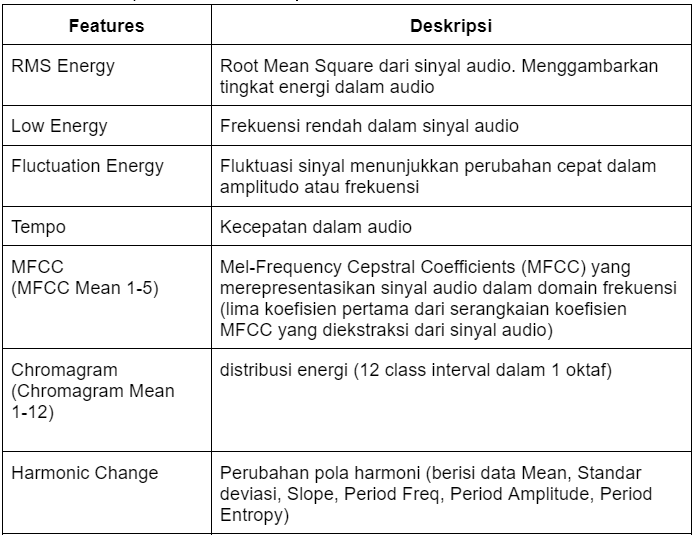

In [28]:
df

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,angry,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,angry,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,angry,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,angry,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


In [29]:
df.describe()

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.134650,0.553605,7.145932,123.682020,2.456422,0.071890,0.488065,0.030465,0.178897,0.038307,...,0.354632,0.590975,0.342340,0.385620,0.328213,0.192997,-0.000157,1.762288,0.769690,0.966712
std,0.064368,0.050750,2.280145,34.234344,0.799262,0.537865,0.294607,0.275839,0.195230,0.203754,...,0.334976,0.357981,0.315808,0.348117,0.055520,0.047092,0.104743,0.930352,0.072107,0.003841
min,0.010000,0.302000,3.580000,48.284000,0.323000,-3.484000,-0.870000,-1.636000,-0.494000,-0.916000,...,0.000000,0.000000,0.000000,0.000000,0.112000,0.060000,-0.285000,0.187000,0.530000,0.939000
25%,0.085000,0.523000,5.859500,101.490250,1.948500,-0.262750,0.281250,-0.117000,0.061250,-0.078250,...,0.066750,0.264500,0.059500,0.060750,0.290750,0.160000,-0.058000,0.961000,0.725000,0.965000
50%,0.128000,0.553000,6.734000,120.132500,2.389500,0.068500,0.464500,0.044500,0.181000,0.049500,...,0.247000,0.612000,0.247000,0.296500,0.333000,0.190000,-0.002000,1.682000,0.786000,0.967000
75%,0.174000,0.583250,7.823500,148.986250,2.860250,0.413250,0.686000,0.198250,0.288500,0.151250,...,0.612000,1.000000,0.565250,0.670750,0.367250,0.226000,0.063250,2.243000,0.824000,0.969000
max,0.431000,0.703000,23.475000,195.026000,5.996000,1.937000,1.622000,1.126000,1.055000,0.799000,...,1.000000,1.000000,1.000000,1.000000,0.488000,0.340000,0.442000,4.486000,0.908000,0.977000


## **Pre-processing**

**Normalisasi data dengan Z-score**
$$ X(stand) = \frac{x - mean (x)}{std_\text{dev}} $$
dimana $${mean = 0}, {std_\text{dev}} = 1 $$

In [30]:
def normalize(data, i):
    # Initialize a list to store the means of each column
    means = [0] * i
    # Initialize a list to store the standard deviations of each column
    stds = [1] * i
    # Loop through the columns
    for j in range(i):
        # Compute the mean of the column
        mean = data.iloc[:, j].mean()
        # Compute the standard deviation of the column
        std = data.iloc[:, j].std()
        # Store the mean and standard deviation
        means[j] = mean
        stds[j] = std
    # Loop through the rows
    for index, row in data.iterrows():
        # Loop through the columns
        for j in range(i):
            # Normalize the value by subtracting the mean and dividing by the standard deviation
            row[j] = (row[j] - means[j]) / stds[j]
    # Return the normalized data
    return data

In [31]:
df.duplicated().sum()

12

Karena terdapat nilai yang duplikat, selanjutnya value yang duplikat dihapus.

In [32]:
# drop duplicate
df = df.drop_duplicates(keep='first')

Selanjutnya dilakukan split fitur dan target untuk persiapan pemodelan

In [33]:
# Split feature and target
X = df.drop(columns=['Class'])
y = df['Class']

Dilakukan normalisasi dengan metode standarisasi pada semua fitur

In [34]:
X = normalize(X,50)
X

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,-1.272863,0.724549,0.910332,0.184485,1.940591,0.533531,1.342709,0.176184,0.194331,0.383737,...,0.207447,1.143513,-1.063516,-0.825846,-0.221041,1.447311,0.166633,-0.794990,-2.447998,0.849226
1,-0.141269,-2.270546,-0.198455,0.542841,2.017159,0.817391,0.998348,1.320472,1.910184,3.700735,...,-1.057144,1.143513,-1.088927,1.695816,-0.779237,0.384200,-0.791482,1.701411,-0.935784,0.074540
2,-1.365871,1.670369,1.561337,1.891824,0.406721,1.535389,0.042915,1.076549,0.532379,0.490894,...,-0.514324,0.435849,-1.038105,1.741509,1.525571,2.255275,1.278046,-0.101486,-1.074519,-0.958374
3,0.013743,0.961004,1.499939,-1.697403,0.489565,2.739475,0.414284,1.155465,-0.881279,0.505506,...,-0.949773,1.143513,-0.577529,1.047552,1.687627,1.532360,0.396581,-1.524938,-0.366969,0.332769
4,-1.055845,0.724549,1.196106,-1.024616,0.961525,0.283066,1.096254,0.240752,1.285306,1.197156,...,-1.051179,-0.516990,2.087458,-1.111424,0.301142,1.447311,0.846895,-1.102619,-1.324242,-2.507745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.618294,0.468390,-0.837272,1.098253,0.670316,-0.019347,0.772150,0.061397,0.419696,0.315546,...,0.052356,0.692168,0.222920,-0.757307,-0.094997,-1.125418,1.143910,0.980038,1.353348,0.590997
396,0.649296,-1.107976,-0.937947,1.645996,0.425549,-0.414524,-0.497260,-0.143068,-0.789084,-0.001054,...,-1.003458,1.143513,0.943959,-1.085722,-1.715565,-1.401827,1.383439,1.701411,1.519830,0.074540
397,0.819810,0.054594,-1.081512,0.301685,-0.977778,0.910155,1.319076,-0.508954,0.312135,0.851331,...,-0.908018,-1.129927,-0.177304,-0.825846,-1.067338,-0.763960,1.057680,1.701411,0.687419,-1.216602
398,0.091250,0.369867,-1.196183,-0.298621,-0.569834,-0.529552,0.691124,0.215643,0.117501,0.110973,...,-0.654503,1.143513,-0.123306,-0.714470,-0.923287,-1.040369,0.578622,1.701411,0.576431,0.590997


### **One-hot Encoding for y**

Mengubah value pada label target kategorik menjadi numerik (0 = negatif, 1 = positif)

In [35]:
y = pd.get_dummies(y, columns = ['Class'])
y

,angry,happy,relax,sad
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
395,True,False,False,False
396,True,False,False,False
397,True,False,False,False
398,True,False,False,False


# **Training**

Sebelum melakukan training, pada bagian ini dibuatkan beberapa class dan definisi function untuk menunjang pembuatan layer Neural Network. Class yang dibuat diantaranya:
1. Layer: Menginisiasi <i>layer</i> yang akan dibuat.
2. FCLayer: Membuat <i>layer</i> yang ditugaskan untuk melakukan <i>feed forward</i>, <i>backpropagation</i>, dan memperbaharui parameter <i>weight</i> dan <i>bias</i> dengan algoritma Gradient Descent.
3. Activation Layer: Membuat <i>layer</i> yang berisi fungsi aktivasi.
4. NeuralNetwork: Menampung <i>layer neural network</i> yang akan dibangun.

## **Fungsi Aktivasi & Loss:**
Disediakan pilihan fungsi aktivasi beserta turunan pertamanya.

- Sigmoid:
$$\sigma(x) = \frac{1}{1 + e^{-x}} $$
$$\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$$
- Softmax:
$${softmax}(x_i) = \frac{e^{x_i - \max(x)}}{\sum{e^{x - \max(x)}}} $$
$$ softmax'(x) = {softmax}(x_i) \cdot (1 - {softmax}(x_i))$$
- ReLU
$${ReLU}(x) = \max(0, x) $$
$${ReLU}'(x) = \begin{cases} 1 & \text{jika } x > 0 \\ 0 & \text{jika } x \leq 0 \end{cases} $$


**Loss Function:**
- Categorical Cross-Entropy:
$${CCE}(y_{\text{true}}, y_{\text{pred}}) = -\frac{1}{N} \sum{y_{\text{true}} \cdot \log(y_{\text{pred}})} $$
- Turunan Categorical Cross-Entropy:
   $${CCE}'(y_{\text{true}}, y_{\text{pred}}) = -\frac{y_{\text{true}}}{y_{\text{pred}}}$$


In [36]:
import numpy as np

np.random.seed(42)

# Define the ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_prime(x):
    return (x > 0).astype(float)

# Define the softmax activation function and its derivative
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def softmax_prime(x):
    s = softmax(x)
    return s * (1 - s)

# Define the loss functions and their derivatives
def categorical_crossentropy(y_true, y_pred):
    # Clip the predictions to avoid log(0) error
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    # Compute the cross entropy
    return -np.mean(y_true * np.log(y_pred))

def categorical_crossentropy_derivative(y_true, y_pred):
    # Clip the predictions to avoid division by zero error
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    # Compute the derivative of cross entropy
    return - (y_true / y_pred)

## Class Layer:
#TODO update

Algoritma optimasi Gradient Descend diimplementasikan pada layer ini dengan persamaan
$${w}{_{\text{new}}} = {w}{_{\text{current}}} - \alpha \cdot \frac{dL}{dw}$$
$${b}{_{\text{new}}} = {b}{_{\text{current}}} - \alpha \cdot \frac{dL}{db}$$

Nilai turunan Loss terhadap tiap parameter didapatkan dari <i> backward propagation </i>

In [37]:
# Define a class for the input layer
class InputLayer:
    def __init__(self, input_size):
        self.input_size = input_size

class HiddenLayer:
    def __init__(self, input_size, hidden_size, activation=relu, activation_prime=relu_prime):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.activation = activation
        self.activation_prime = activation_prime
        self.W = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
        self.b = np.random.randn(hidden_size) * 0.01

    def forward(self, X):
        self.Z = X.dot(self.W) + self.b
        self.A = self.activation(self.Z)
        return self.A

    def backward(self, X, dA):
        if self.activation_prime == softmax_prime:  # output layer
            self.dZ = dA
        else:  # hidden layer
            self.dZ = dA * self.activation_prime(self.Z)
        self.dW = X.T.dot(self.dZ) / X.shape[0]
        self.db = np.sum(self.dZ, axis=0) / X.shape[0]
        self.dX = self.dZ.dot(self.W.T)
        return self.dX

    def update(self, learning_rate):
        self.W -= learning_rate * self.dW
        self.b -= learning_rate * self.db

## Class Neural Network:

In [38]:
# Define a class for the neural network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.input_layer = InputLayer(input_size)
        self.hidden_layer = HiddenLayer(input_size, hidden_size)
        self.output_layer = HiddenLayer(hidden_size, output_size, activation=softmax, activation_prime=softmax_prime)
        self.learning_rate = learning_rate
        self.loss = lambda y_true, y_pred: -np.sum(y_true * np.log(y_pred + 1e-9)) / y_true.shape[0]

    def forward(self, X):
        A1 = self.hidden_layer.forward(X)
        A2 = self.output_layer.forward(A1)
        return A2

    def backward(self, X, y):
        dA2 = self.output_layer.A - y
        dA1 = self.output_layer.backward(self.hidden_layer.A, dA2)
        self.hidden_layer.backward(X, dA1)

    def update(self):
        self.hidden_layer.update(self.learning_rate)
        self.output_layer.update(self.learning_rate)

    def train(self, X, y, epochs):
        batch_size = 32
        for epoch in range(epochs):
            permutation = np.random.permutation(X.shape[0])
            X = X[permutation]
            y = y[permutation]
            n_batches = X.shape[0] // batch_size
            for i in range(n_batches):
                X_batch = X[i * batch_size : (i + 1) * batch_size]
                y_batch = y[i * batch_size : (i + 1) * batch_size]
                y_pred = self.forward(X_batch)
                self.backward(X_batch, y_batch)
                self.update()
            y_pred = self.forward(X)
            loss = self.loss(y, y_pred)
            accuracy = np.mean(np.argmax(y, axis=1) == np.argmax(y_pred, axis=1))
            print(f"Epoch {epoch+1}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

## Train

NN yang dibangun memiliki 3 layer, yaitu:
1. Input Layer berisi 50 node
2. Hidden Layer berisi 32 node dengan fungsi aktivasi ReLU
3. Output Layer berisi 4 node dengan fungsi aktivasi softmax dan loss function categorical cross entropy

Nilai learning rate yang digunakan adalah 0.1 dan iterasi sebanyak 100 kali

In [39]:
# # Generate some dummy data and labels
# X = np.random.randn(100, 10) # 100 samples with 10 features each
# y = np.eye(3)[np.random.randint(0, 3, 100)] # 100 one-hot encoded labels with 3 classes

# Create an instance of the neural network with 10 input features, 5 hidden units, and 3 output classes
nn = NeuralNetwork(X.shape[1], 256, y.shape[1], 0.0001)

# Train the neural network for 20 epochs
nn.train(X.to_numpy(), y.to_numpy(), 10000)


Epoch 1, Loss: 2.1754, Accuracy: 0.2113
Epoch 2, Loss: 2.1577, Accuracy: 0.2088
Epoch 3, Loss: 2.1408, Accuracy: 0.2088
Epoch 4, Loss: 2.1239, Accuracy: 0.2088
Epoch 5, Loss: 2.1072, Accuracy: 0.2165
Epoch 6, Loss: 2.0909, Accuracy: 0.2191
Epoch 7, Loss: 2.0749, Accuracy: 0.2191
Epoch 8, Loss: 2.0592, Accuracy: 0.2191
Epoch 9, Loss: 2.0438, Accuracy: 0.2268
Epoch 10, Loss: 2.0288, Accuracy: 0.2294
Epoch 11, Loss: 2.0140, Accuracy: 0.2294
Epoch 12, Loss: 1.9994, Accuracy: 0.2294
Epoch 13, Loss: 1.9851, Accuracy: 0.2268
Epoch 14, Loss: 1.9713, Accuracy: 0.2268
Epoch 15, Loss: 1.9574, Accuracy: 0.2294
Epoch 16, Loss: 1.9440, Accuracy: 0.2320
Epoch 17, Loss: 1.9306, Accuracy: 0.2345
Epoch 18, Loss: 1.9175, Accuracy: 0.2345
Epoch 19, Loss: 1.9049, Accuracy: 0.2397
Epoch 20, Loss: 1.8922, Accuracy: 0.2448
Epoch 21, Loss: 1.8799, Accuracy: 0.2448
Epoch 22, Loss: 1.8677, Accuracy: 0.2448
Epoch 23, Loss: 1.8557, Accuracy: 0.2448
Epoch 24, Loss: 1.8440, Accuracy: 0.2474
Epoch 25, Loss: 1.8325, A

Epoch 31, Loss: 1.7680, Accuracy: 0.2526
Epoch 32, Loss: 1.7577, Accuracy: 0.2552
Epoch 33, Loss: 1.7477, Accuracy: 0.2577
Epoch 34, Loss: 1.7378, Accuracy: 0.2577
Epoch 35, Loss: 1.7282, Accuracy: 0.2603
Epoch 36, Loss: 1.7187, Accuracy: 0.2603
Epoch 37, Loss: 1.7092, Accuracy: 0.2603
Epoch 38, Loss: 1.7000, Accuracy: 0.2603
Epoch 39, Loss: 1.6909, Accuracy: 0.2629
Epoch 40, Loss: 1.6820, Accuracy: 0.2680
Epoch 41, Loss: 1.6733, Accuracy: 0.2732
Epoch 42, Loss: 1.6646, Accuracy: 0.2758
Epoch 43, Loss: 1.6561, Accuracy: 0.2732
Epoch 44, Loss: 1.6477, Accuracy: 0.2732
Epoch 45, Loss: 1.6394, Accuracy: 0.2758
Epoch 46, Loss: 1.6312, Accuracy: 0.2809
Epoch 47, Loss: 1.6232, Accuracy: 0.2809
Epoch 48, Loss: 1.6152, Accuracy: 0.2809
Epoch 49, Loss: 1.6075, Accuracy: 0.2861
Epoch 50, Loss: 1.5998, Accuracy: 0.2964
Epoch 51, Loss: 1.5923, Accuracy: 0.2990
Epoch 52, Loss: 1.5849, Accuracy: 0.3067
Epoch 53, Loss: 1.5775, Accuracy: 0.3067
Epoch 54, Loss: 1.5703, Accuracy: 0.3041
Epoch 55, Loss: 

# Uji Coba dengan PCA

Dalam uji coba ini, langkah yang dilakukan setelah data dinormalisasi ialah PCA untuk mencari fitur yang relevan. Perhitungan dalam PCA dilakukan dengan membuat class bernama do_pca yang berisi langkah-langkah di bawah ini:

- menghitung covariance matrix
\begin{align}
        Cov (\sum) = \begin{pmatrix}
        cov (x_1,x_1) & cov(x_1,x_2) & ... & cov(x_1,x_m) \\
        | & | & | & | \\
        cov (x_m,x_1) & cov(x_m,x_2) & ... & cov(x_m,x_m)
        \end{pmatrix}
\end{align}
  
  di mana \(X\) adalah matriks data yang memiliki dimensi \(n x m\), dengan \(n\) adalah jumlah sampel dan \(m\) adalah jumlah fitur.
- menghitung eigenvalue dan eigenvector
$$ AX = λX $$

In [40]:
# Import numpy and pandas libraries
import numpy as np
import pandas as pd

# Define a function to do a PCA
def do_pca(data, n_components):
  # data: a numpy array of shape (n_samples, n_features)
  # n_components: an integer specifying the number of principal components to keep
  # returns: a numpy array of shape (n_samples, n_components) containing the projected data

  # Calculate the covariance matrix of the data
  cov_matrix = np.cov(data.T)

  # Calculate the eigenvalues and eigenvectors of the covariance matrix
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

  # Sort the eigenvalues and eigenvectors in descending order
  idx = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[idx]
  eigenvectors = eigenvectors[:, idx]

  # Select the first n_components eigenvectors as the principal components
  pc = eigenvectors[:, :n_components]

  # Project the data onto the principal components
  transformed_data = np.dot(data, pc)

  # Return the transformed data
  return transformed_data

## Reduction for highly corellated data

Setelah melakukan perhitungan matriks korelasi, heatmap digambarkan dan dilihat secara total fitur apa yang memiliki korelasi tinggi. Kode dibawah hanya menampilkan korelasi heatmap untuk data yang memiliki korelasi tinggi diatas 0.8

In [41]:
# %pip install seaborn

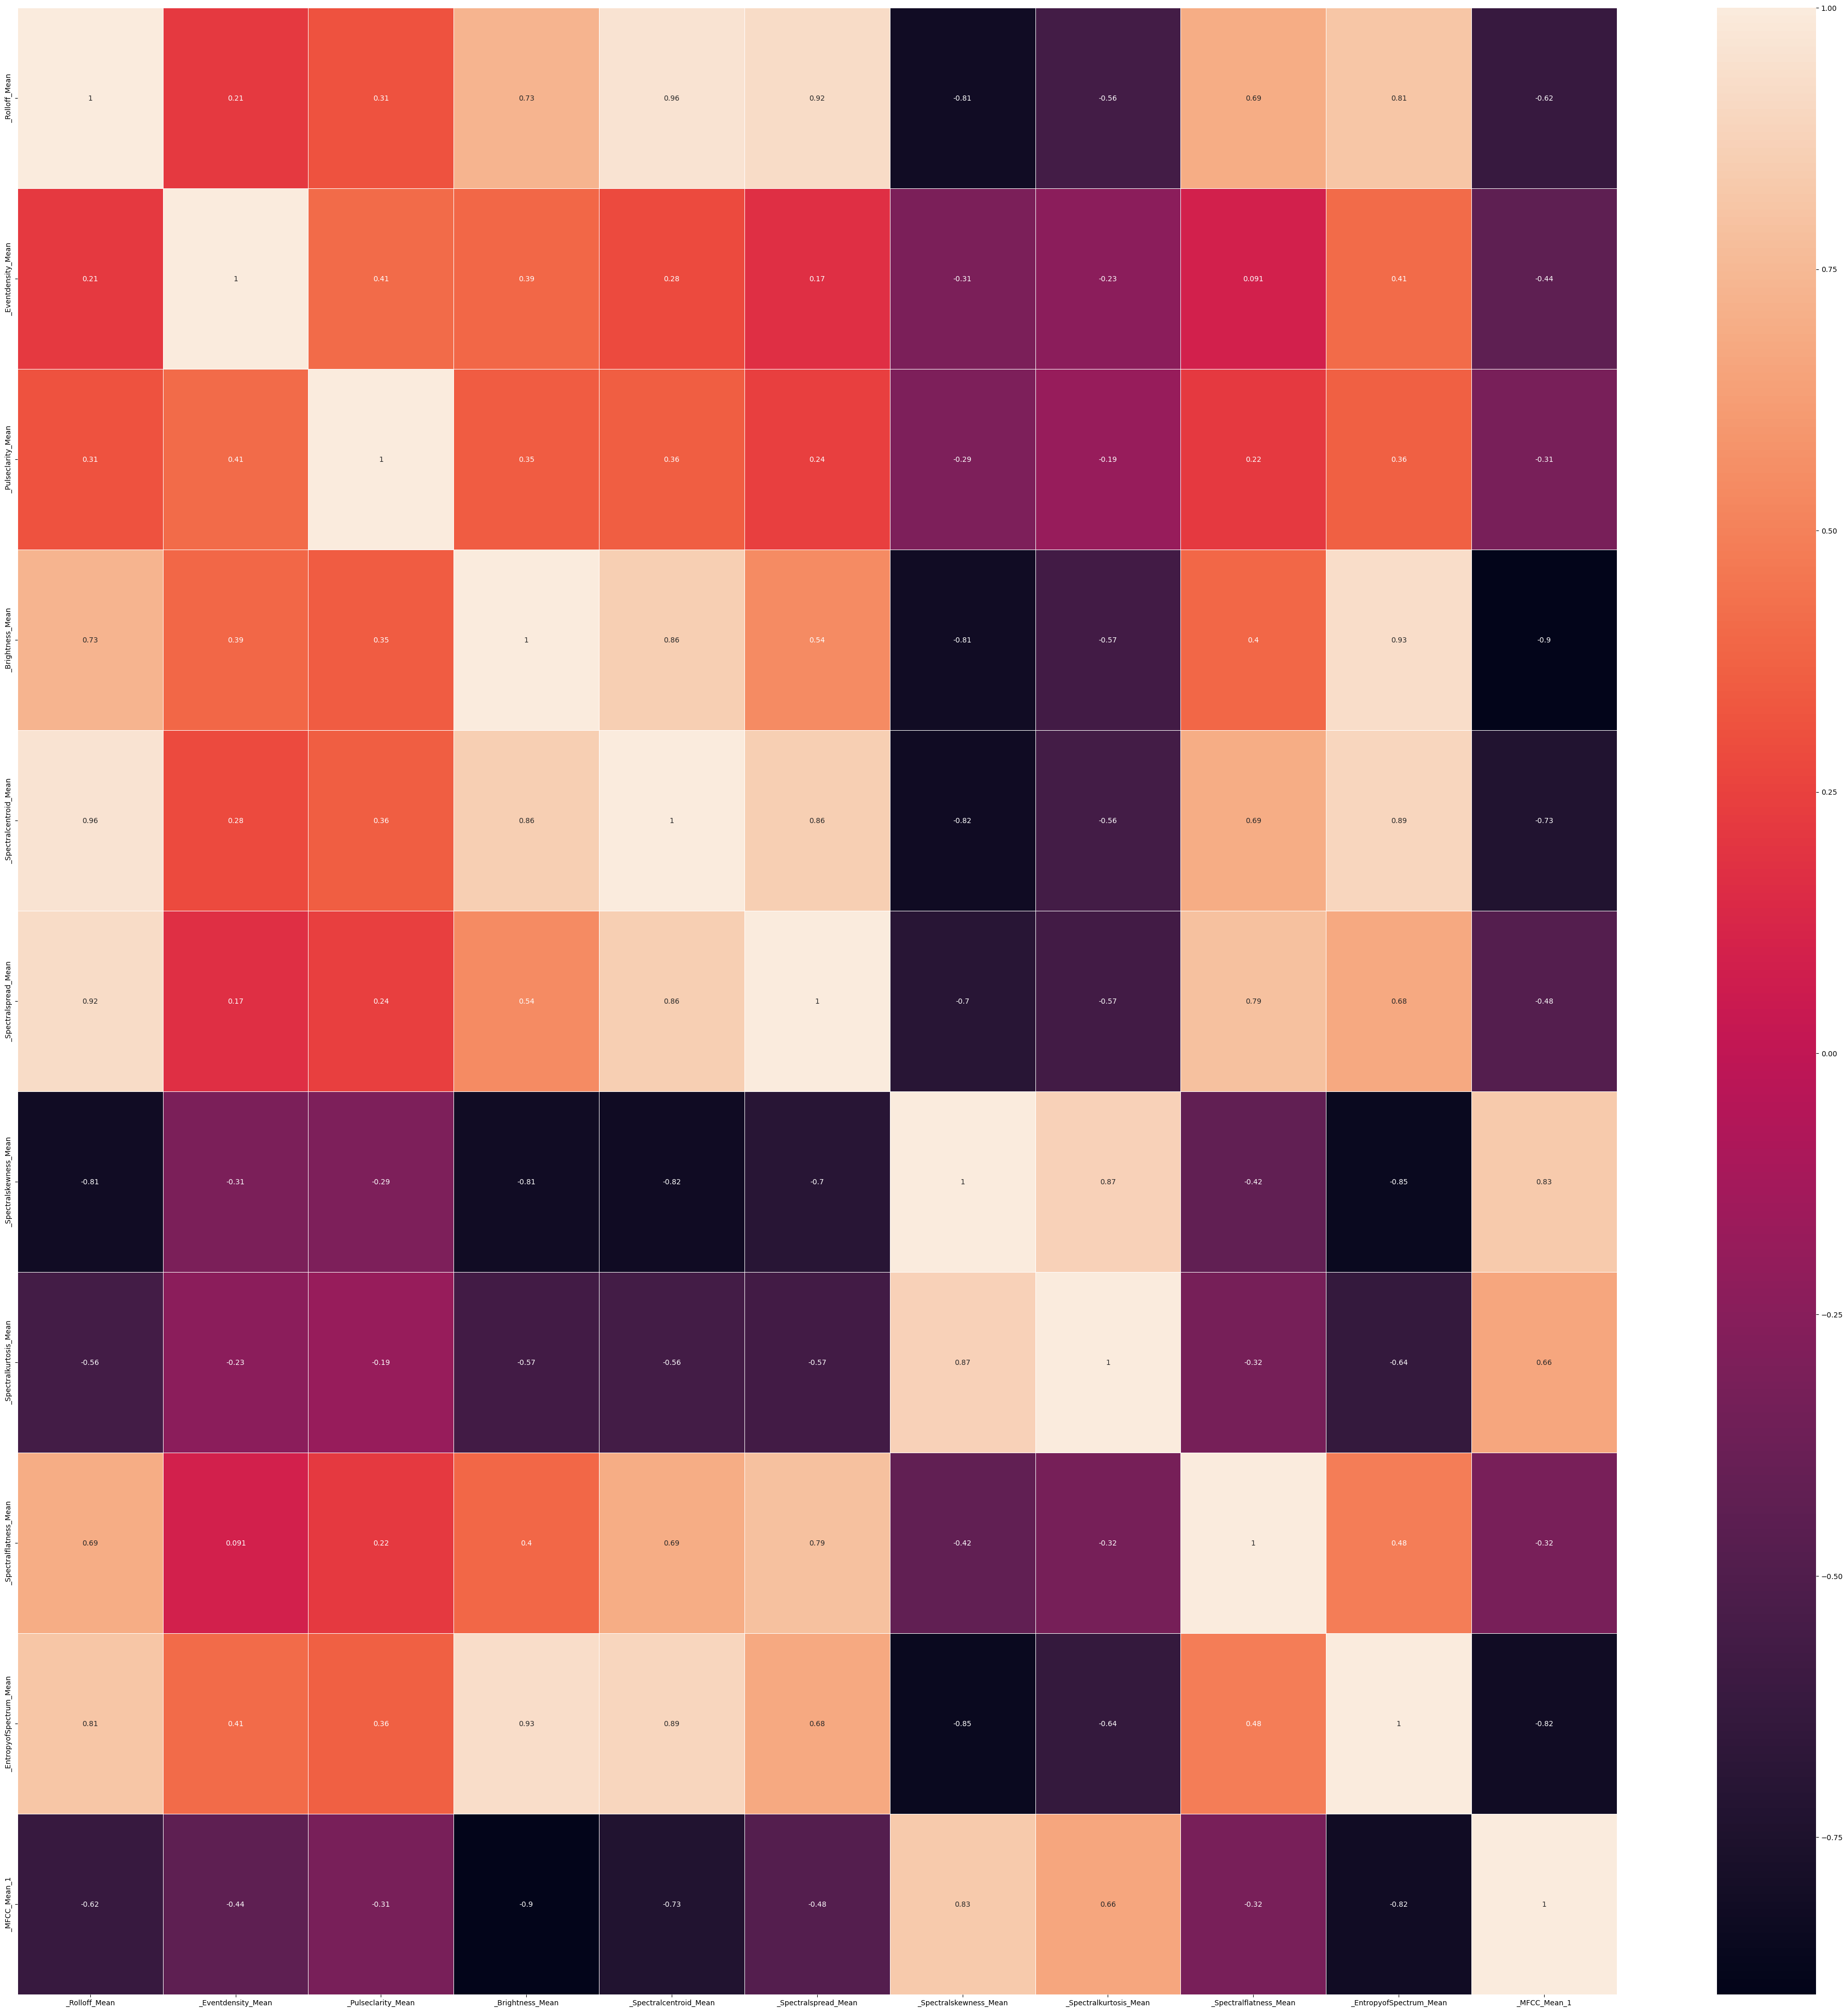

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

data = X[['_Rolloff_Mean','_Eventdensity_Mean','_Pulseclarity_Mean','_Brightness_Mean','_Spectralcentroid_Mean','_Spectralspread_Mean','_Spectralskewness_Mean','_Spectralkurtosis_Mean','_Spectralflatness_Mean','_EntropyofSpectrum_Mean','_MFCC_Mean_1']]
matrix = data.corr(method='pearson')
plt.figure(figsize=(50,50))
sns.heatmap(matrix, annot=True,linewidths=.5)
plt.show()

In [43]:
trial = X[['_Rolloff_Mean','_Brightness_Mean','_Spectralcentroid_Mean','_Spectralspread_Mean','_Spectralskewness_Mean','_Spectralkurtosis_Mean','_EntropyofSpectrum_Mean','_MFCC_Mean_1']]
result = do_pca(trial,1)

In [44]:
X_with_PCA = X.drop(['_Rolloff_Mean','_Brightness_Mean','_Spectralcentroid_Mean','_Spectralspread_Mean','_Spectralskewness_Mean','_Spectralkurtosis_Mean','_EntropyofSpectrum_Mean','_MFCC_Mean_1'],axis=1)
X_with_PCA["PCA_Val"] = result

In [45]:
X_with_PCA

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,_MFCC_Mean_7,...,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy,PCA_Val
0,-1.272863,0.724549,0.910332,0.184485,0.533531,1.342709,0.176184,0.194331,0.383737,-1.159007,...,1.143513,-1.063516,-0.825846,-0.221041,1.447311,0.166633,-0.794990,-2.447998,0.849226,-4.910212
1,-0.141269,-2.270546,-0.198455,0.542841,0.817391,0.998348,1.320472,1.910184,3.700735,-2.543376,...,1.143513,-1.088927,1.695816,-0.779237,0.384200,-0.791482,1.701411,-0.935784,0.074540,-6.073207
2,-1.365871,1.670369,1.561337,1.891824,1.535389,0.042915,1.076549,0.532379,0.490894,-1.680892,...,0.435849,-1.038105,1.741509,1.525571,2.255275,1.278046,-0.101486,-1.074519,-0.958374,3.065147
3,0.013743,0.961004,1.499939,-1.697403,2.739475,0.414284,1.155465,-0.881279,0.505506,-0.071288,...,1.143513,-0.577529,1.047552,1.687627,1.532360,0.396581,-1.524938,-0.366969,0.332769,-0.242623
4,-1.055845,0.724549,1.196106,-1.024616,0.283066,1.096254,0.240752,1.285306,1.197156,0.241843,...,-0.516990,2.087458,-1.111424,0.301142,1.447311,0.846895,-1.102619,-1.324242,-2.507745,-2.510837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.618294,0.468390,-0.837272,1.098253,-0.019347,0.772150,0.061397,0.419696,0.315546,0.758234,...,0.692168,0.222920,-0.757307,-0.094997,-1.125418,1.143910,0.980038,1.353348,0.590997,-0.765846
396,0.649296,-1.107976,-0.937947,1.645996,-0.414524,-0.497260,-0.143068,-0.789084,-0.001054,0.027595,...,1.143513,0.943959,-1.085722,-1.715565,-1.401827,1.383439,1.701411,1.519830,0.074540,2.820960
397,0.819810,0.054594,-1.081512,0.301685,0.910155,1.319076,-0.508954,0.312135,0.851331,1.197716,...,-1.129927,-0.177304,-0.825846,-1.067338,-0.763960,1.057680,1.701411,0.687419,-1.216602,1.796603
398,0.091250,0.369867,-1.196183,-0.298621,-0.529552,0.691124,0.215643,0.117501,0.110973,0.620896,...,1.143513,-0.123306,-0.714470,-0.923287,-1.040369,0.578622,1.701411,0.576431,0.590997,0.401799


Berikut fitur yang memiliki korelasi tinggi terhadap target:

In [46]:
X_with_PCA.columns

Index(['_RMSenergy_Mean', '_Lowenergy_Mean', '_Fluctuation_Mean',
       '_Tempo_Mean', '_MFCC_Mean_2', '_MFCC_Mean_3', '_MFCC_Mean_4',
       '_MFCC_Mean_5', '_MFCC_Mean_6', '_MFCC_Mean_7', '_MFCC_Mean_8',
       '_MFCC_Mean_9', '_MFCC_Mean_10', '_MFCC_Mean_11', '_MFCC_Mean_12',
       '_MFCC_Mean_13', '_Roughness_Mean', '_Roughness_Slope',
       '_Zero-crossingrate_Mean', '_AttackTime_Mean', '_AttackTime_Slope',
       '_Eventdensity_Mean', '_Pulseclarity_Mean', '_Spectralflatness_Mean',
       '_Chromagram_Mean_1', '_Chromagram_Mean_2', '_Chromagram_Mean_3',
       '_Chromagram_Mean_4', '_Chromagram_Mean_5', '_Chromagram_Mean_6',
       '_Chromagram_Mean_7', '_Chromagram_Mean_8', '_Chromagram_Mean_9',
       '_Chromagram_Mean_10', '_Chromagram_Mean_11', '_Chromagram_Mean_12',
       '_HarmonicChangeDetectionFunction_Mean',
       '_HarmonicChangeDetectionFunction_Std',
       '_HarmonicChangeDetectionFunction_Slope',
       '_HarmonicChangeDetectionFunction_PeriodFreq',
       '_Ha

## Train

Dengan struktur NN terdiri dari 3 layer seperti uji coba sebelumnya namun dengan jumlah node input layer sebanyak 43, dilakukan training model sebagai berikut.

In [47]:
# # Generate some dummy data and labels
# X = np.random.randn(100, 10) # 100 samples with 10 features each
# y = np.eye(3)[np.random.randint(0, 3, 100)] # 100 one-hot encoded labels with 3 classes

# Create an instance of the neural network with 10 input features, 5 hidden units, and 3 output classes
nn = NeuralNetwork(X.shape[1], 256, y.shape[1], 0.0001)

# Train the neural network for 20 epochs
nn.train(X.to_numpy(), y.to_numpy(), 10000)


Epoch 1, Loss: 1.9223, Accuracy: 0.2165
Epoch 2, Loss: 1.9106, Accuracy: 0.2268
Epoch 3, Loss: 1.8991, Accuracy: 0.2345
Epoch 4, Loss: 1.8880, Accuracy: 0.2320
Epoch 5, Loss: 1.8771, Accuracy: 0.2320
Epoch 6, Loss: 1.8664, Accuracy: 0.2345
Epoch 7, Loss: 1.8559, Accuracy: 0.2371
Epoch 8, Loss: 1.8455, Accuracy: 0.2371
Epoch 9, Loss: 1.8354, Accuracy: 0.2345
Epoch 10, Loss: 1.8256, Accuracy: 0.2345
Epoch 11, Loss: 1.8157, Accuracy: 0.2345
Epoch 12, Loss: 1.8062, Accuracy: 0.2397
Epoch 13, Loss: 1.7968, Accuracy: 0.2397
Epoch 14, Loss: 1.7876, Accuracy: 0.2423
Epoch 15, Loss: 1.7786, Accuracy: 0.2474
Epoch 16, Loss: 1.7698, Accuracy: 0.2526
Epoch 17, Loss: 1.7611, Accuracy: 0.2526
Epoch 18, Loss: 1.7527, Accuracy: 0.2603
Epoch 19, Loss: 1.7443, Accuracy: 0.2603
Epoch 20, Loss: 1.7359, Accuracy: 0.2629
Epoch 21, Loss: 1.7278, Accuracy: 0.2629
Epoch 22, Loss: 1.7198, Accuracy: 0.2629
Epoch 23, Loss: 1.7120, Accuracy: 0.2655
Epoch 24, Loss: 1.7043, Accuracy: 0.2680
Epoch 25, Loss: 1.6968, A